# Assessing the Causal Impact of Marketing Campaigns on E-commerce Sales
*Name: Chen Yang*  
*NUID: 002837912*

## Abstract
This notebook presents a comprehensive causal analysis to evaluate the impact of targeted marketing campaigns on the sales performance of an e-commerce platform. Leveraging a counterfactual framework, the study investigates whether observed fluctuations in daily sales can be causally attributed to marketing interventions or are driven by external factors. 

Central to this analysis is the integration of rigorous data preparation techniques with causal inference methodologies. The notebook utilizes the publicly available Online Retail dataset from the UCI Machine Learning Repository, which contains transaction-level data from a UK-based retailer. To enhance this dataset for our causal study, we augment it with synthetic variables representing marketing campaign activity, discount rates, website visits, and seasonal effects.

The chapter provides an in-depth exploration of data preprocessing steps essential for causal analysis, including handling missing data, feature selection, and proper encoding of categorical variables. Additionally, we demonstrate the construction and interpretation of Directed Acyclic Graphs (DAGs) to visualize assumed causal relationships and identify potential confounders. Through a combination of theoretical discussions and practical Python code examples, readers will gain the skills to perform robust causal analysis in machine learning contexts.

By the end of this notebook, practitioners and researchers will understand how meticulous data preparation can enhance the reliability of causal inference, leading to more informed business decisions in digital marketing and e-commerce sales.


## Introduction to Causality

Causality is the cornerstone of understanding how one event influences another, and it is a fundamental aspect in both scientific research and business analytics. In the context of e-commerce, establishing a causal relationship helps in determining whether a marketing campaign directly leads to increased sales or if the observed changes are driven by other factors. Causal inference goes beyond simple correlation by addressing the question: "What would have happened if we had not implemented the campaign?" This is achieved through counterfactual reasoning, where we compare the observed outcome with the hypothetical scenario in which the campaign did not occur.

For instance, consider a scenario where an e-commerce platform launches a targeted marketing campaign. A naive analysis might show a strong correlation between the campaign days and an increase in daily sales. However, several other factors, such as seasonal variations, discounts offered, and fluctuations in website visits, could also influence sales. To disentangle these effects, we use Directed Acyclic Graphs (DAGs) to visually represent the assumed causal relationships. In our DAG, the marketing campaign (treatment) is hypothesized to affect sales (outcome) directly, but it may also have an indirect impact by increasing website visits. Meanwhile, external factors like seasonality can influence both the likelihood of running a campaign and the sales outcomes.

By explicitly mapping these relationships, we identify potential confounders and determine which variables require adjustment in our causal model. This rigorous approach enables us to estimate the true effect of the marketing campaign on sales, ensuring that our conclusions are not biased by spurious associations. In the following sections, we will illustrate these concepts using our augmented Online Retail dataset, applying robust data preprocessing techniques and causal inference methodologies to provide actionable insights for e-commerce strategies.


## Theory Section

In this section, we lay out the theoretical underpinnings that support our causal analysis on the impact of marketing campaigns on e-commerce sales. We focus on three core areas: causality principles, handling missing data, feature selection, and encoding categorical variables. For each topic, we discuss the strengths and weaknesses and describe in detail how these methods can be implemented in our study. Simple executable code examples are provided to help illustrate the logic behind each step.

---

### 1. Causality Principles

Understanding causality is central to determining if marketing campaigns truly affect e-commerce sales, rather than merely being associated with changes in sales figures. Our analysis is grounded in the counterfactual or potential outcomes framework, which asks: "What would sales have been if the marketing campaign had not been executed?" This approach requires a clear distinction between correlation and causation.

**Strengths:**
- **Counterfactual Reasoning:** Provides a conceptual framework to estimate what would have occurred in the absence of the treatment (campaign).
- **Graphical Representation:** Directed Acyclic Graphs (DAGs) allow us to visualize complex causal relationships, identify confounders, and plan adjustments.
- **Structured Framework:** Formal methods (e.g., do-calculus) provide a systematic way to identify biases and estimate causal effects.

**Weaknesses:**
- **Assumptions Heavy:** Requires strong assumptions such as no unmeasured confounding, which may not always hold in observational studies.
- **Complexity:** Constructing and validating a causal model can be complex and requires both domain expertise and statistical knowledge.

**Application to Our Topic:**
For our study, we hypothesize that the marketing campaign (treatment) impacts e-commerce sales (outcome) both directly and indirectly via increased website visits. Confounding factors such as seasonal effects and discount rates must be accounted for. We can illustrate this with a DAG:


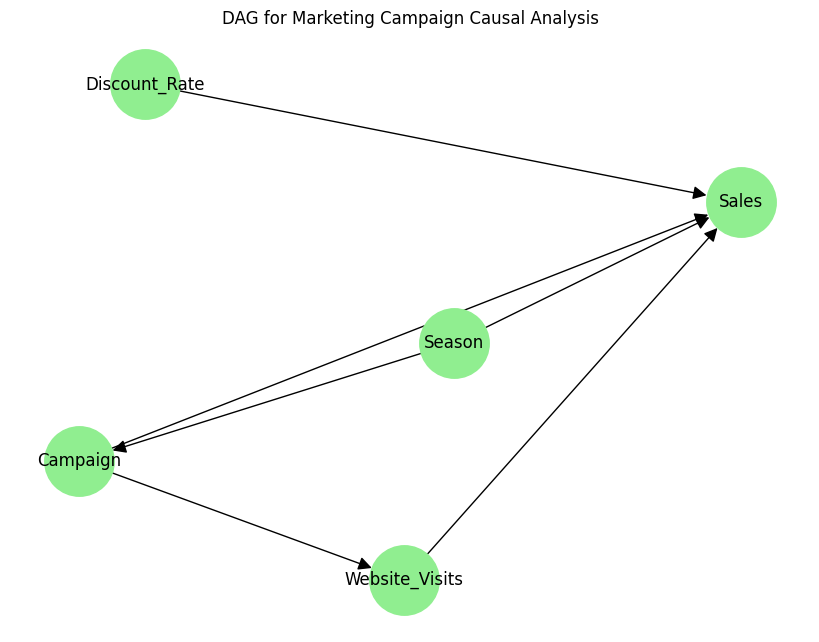

In [25]:
import matplotlib.pyplot as plt
import networkx as nx

# Constructing a simple DAG for our study
dag = nx.DiGraph()
nodes = ['Campaign', 'Website_Visits', 'Sales', 'Season', 'Discount_Rate']
dag.add_nodes_from(nodes)

# Define the assumed causal relationships
dag.add_edge('Campaign', 'Sales')           # Direct effect
dag.add_edge('Campaign', 'Website_Visits')    # Indirect effect through website visits
dag.add_edge('Website_Visits', 'Sales')       # Website visits influencing sales
dag.add_edge('Season', 'Campaign')            # Season affecting likelihood of campaign
dag.add_edge('Season', 'Sales')               # Season affecting sales
dag.add_edge('Discount_Rate', 'Sales')          # Discount rate impacting sales

# Visualize the DAG
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(dag)
nx.draw(dag, pos, with_labels=True, node_color='lightgreen', node_size=2500, arrowsize=20)
plt.title("DAG for Marketing Campaign Causal Analysis")
plt.show()

### Causality Principles: Directed Acyclic Graph (DAG) Explanation

In the figure above, we see a Directed Acyclic Graph (DAG) illustrating the hypothesized causal structure between the variables in our study: **Campaign**, **Website_Visits**, **Discount_Rate**, **Season**, and **Sales**. A DAG is a visual representation that helps us understand and communicate how we believe the variables interact causally, and it plays a pivotal role in identifying potential confounders and mediators. 

In this specific graph, **Campaign** is considered our primary intervention (or treatment). The arrows emanating from **Campaign** point to **Sales** (a direct effect) and **Website_Visits** (an indirect effect), suggesting that launching a campaign might not only directly boost sales but also do so indirectly by increasing the number of visitors to the website. The **Website_Visits** node, in turn, connects to **Sales**, reflecting the assumption that higher website traffic can lead to increased purchases. Meanwhile, **Season** is posited to influence both the likelihood of running a campaign (e.g., higher marketing activity during holiday seasons) and overall **Sales** levels. Finally, **Discount_Rate** has a direct arrow to **Sales**, capturing the notion that offering discounts can independently drive up sales figures.

The Python code snippet used to create this DAG leverages the `networkx` library to define a directed graph and add edges that represent our causal assumptions. We first instantiate a directed graph (`nx.DiGraph()`), then define the nodes as a list of variable names. Next, we add edges between these nodes to reflect the presumed causal relationships. The `nx.draw` function is used to render the graph, with parameters like `node_color`, `node_size`, and `arrowsize` controlling the appearance of the nodes and arrows. Finally, we apply `plt.show()` to display the DAG, resulting in the visualization you see. 

By carefully examining this DAG, we can identify which variables may confound the relationship between **Campaign** and **Sales**, such as **Season**, and which variables might act as mediators, like **Website_Visits**. This graphical framework ultimately guides our data preparation and statistical modeling decisions to ensure that our inferences about the causal impact of marketing campaigns on sales are as accurate and unbiased as possible.


### 2. Handling Missing Data

Missing data is a common challenge in real-world datasets. In our context, missing values could arise from incomplete transaction records or errors in data entry. If not properly addressed, missing data can introduce bias and weaken our causal estimates.

**Strengths:**
- **Imputation Methods:** Techniques like median imputation, mean imputation, or advanced methods like multiple imputation can restore dataset integrity.
- **Preserves Data:** Proper handling of missing data allows us to retain valuable observations that might otherwise be discarded.

**Weaknesses:**
- **Imputation Bias:** Simple imputation methods may introduce bias if the missingness mechanism is not random.
- **Complexity in Multiple Imputation:** Advanced techniques require careful modeling and can be computationally intensive.

**Implementation Example:**
In our augmented Online Retail dataset, we may encounter missing values in fields like discount rates or website visits. Here is a simple example of median imputation:

In [26]:
import pandas as pd
import numpy as np

# Assume we have a DataFrame 'df_daily' with missing values in 'Discount_Rate'
# For demonstration, introduce some NaN values artificially
df_daily = pd.DataFrame({
    'Date': pd.date_range(start='2022-01-01', periods=10, freq='D'),
    'Discount_Rate': [np.nan, 5.0, 8.0, np.nan, 12.0, 7.0, np.nan, 15.0, 10.0, np.nan]
})

# Display original missing data
print("Before imputation:")
print(df_daily)

# Perform median imputation for 'Discount_Rate'
median_discount = df_daily['Discount_Rate'].median()
df_daily['Discount_Rate'].fillna(median_discount, inplace=True)

print("\nAfter median imputation:")
print(df_daily)


Before imputation:
        Date  Discount_Rate
0 2022-01-01            NaN
1 2022-01-02            5.0
2 2022-01-03            8.0
3 2022-01-04            NaN
4 2022-01-05           12.0
5 2022-01-06            7.0
6 2022-01-07            NaN
7 2022-01-08           15.0
8 2022-01-09           10.0
9 2022-01-10            NaN

After median imputation:
        Date  Discount_Rate
0 2022-01-01            9.0
1 2022-01-02            5.0
2 2022-01-03            8.0
3 2022-01-04            9.0
4 2022-01-05           12.0
5 2022-01-06            7.0
6 2022-01-07            9.0
7 2022-01-08           15.0
8 2022-01-09           10.0
9 2022-01-10            9.0


This code demonstrates a straightforward approach to handling missing data, ensuring our causal analysis is based on a complete dataset.

### 3. Feature Selection

Feature selection is critical to isolate the variables that directly influence the outcome. In our analysis, selecting the right features—such as campaign activity, website visits, discount rates, and season—helps us adjust for confounders and avoid biased estimates.

**Strengths:**
- **Improved Model Performance:** Reducing irrelevant features can improve model accuracy and interpretability.
- **Reduction in Overfitting:** Fewer features reduce the risk of overfitting, particularly in complex models.
- **Focused Analysis:** Concentrates on variables that have a theoretical or empirical link to the outcome.

**Weaknesses:**
- **Risk of Omitting Important Variables:** Overly aggressive feature selection might remove variables that are important confounders.
- **Subjectivity:** The process can be subjective, particularly when relying on domain knowledge.

**Implementation Example:**
For our dataset, we can perform feature selection by evaluating the correlation between sales and potential predictors, and then select variables based on both statistical evidence and domain expertise.

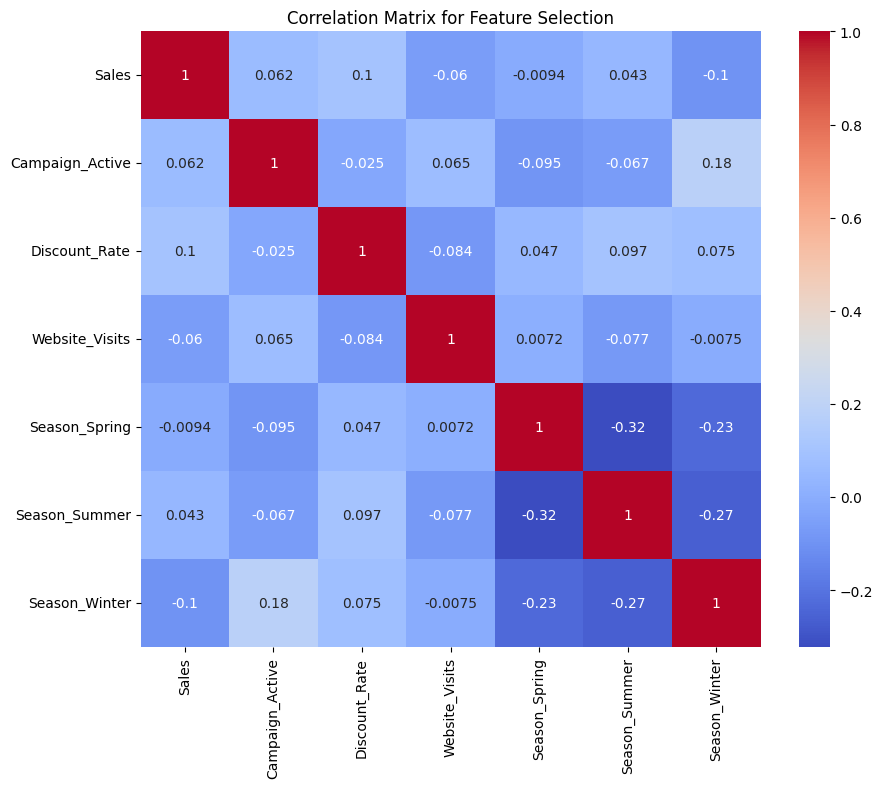

In [27]:
# Example: Feature Selection using a Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assume we have a DataFrame 'df_daily' with our variables
# Here is a synthetic DataFrame snippet for illustration:
df_daily = pd.DataFrame({
    'Sales': np.random.uniform(100, 500, 100),
    'Campaign_Active': np.random.binomial(1, 0.3, 100),
    'Discount_Rate': np.random.uniform(0, 30, 100),
    'Website_Visits': np.random.poisson(lam=500, size=100),
    'Season': np.random.choice(['Winter', 'Spring', 'Summer', 'Fall'], 100)
})

# Convert 'Season' to dummy variables for correlation analysis
df_encoded = pd.get_dummies(df_daily, columns=['Season'], drop_first=True)

# Compute the correlation matrix
corr_matrix = df_encoded.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Feature Selection")
plt.show()

# Based on domain knowledge and correlation strength, we would focus on:
# - Campaign_Active
# - Discount_Rate
# - Website_Visits
# and encoded seasonal indicators.


### Feature Selection Using a Correlation Matrix

Feature selection is a critical step in any data analysis or machine learning pipeline, particularly in causal studies where we aim to isolate the true effect of a treatment (e.g., a marketing campaign) on an outcome (e.g., e-commerce sales). In the code snippet above, we illustrate one way to perform feature selection using a correlation matrix, and then visualize the results using a heatmap.

First, we import the `seaborn` and `matplotlib.pyplot` libraries for data visualization. We assume that we already have a DataFrame named `df_daily` containing variables such as `Sales`, `Campaign_Active`, `Discount_Rate`, `Website_Visits`, and `Season`. Since `Season` is a categorical variable, we convert it into multiple binary columns (also known as one-hot encoding) using the `pd.get_dummies` function. By setting `drop_first=True`, we avoid the dummy variable trap (i.e., redundant columns that can introduce multicollinearity).

Next, we compute the correlation matrix with the `corr()` method. This generates a table indicating how strongly each variable correlates with every other variable, typically using Pearson’s correlation coefficient. A positive correlation (closer to +1) means that as one variable increases, the other tends to increase, while a negative correlation (closer to –1) indicates an inverse relationship. A correlation near zero suggests little to no linear relationship.

We then visualize this correlation matrix using `sns.heatmap`. The `annot=True` parameter prints the correlation values within each cell, and `cmap='coolwarm'` applies a diverging color palette where red typically indicates positive correlation and blue indicates negative correlation. The diagonal cells, which compare each variable with itself, are always 1.0, and the symmetrical nature of the matrix reflects how correlation is mirrored across the diagonal.

In the accompanying image, you can see that `Sales` correlates positively or negatively with different variables. For example, `Campaign_Active` might show a slight positive correlation with `Sales`, indicating that sales might increase during campaign periods. `Website_Visits` often has a stronger positive correlation, suggesting that higher website traffic tends to boost sales. Conversely, some seasonal indicators (e.g., `Season_Spring`) might correlate differently with `Sales`, reflecting that certain seasons can lead to lower or higher average sales.

By examining both the numerical values and color gradients in the heatmap, we can identify which variables have stronger relationships with our outcome of interest. We also leverage domain knowledge—understanding which features are theoretically relevant—to avoid spurious correlations. This approach helps us select the most meaningful variables to include in subsequent causal or predictive models, ensuring that our analysis remains both statistically sound and contextually appropriate.


### 4. Encoding Categorical Variables

Categorical variables like season can carry significant causal information. However, most statistical and machine learning models require numerical inputs. Thus, proper encoding is essential to preserve the inherent relationships without introducing unintended biases.

**Strengths:**
- **Preservation of Information:** Techniques like one-hot encoding maintain the qualitative distinctions between categories.
- **Model Compatibility:** Converts categorical data into a numerical format that is usable in regression and other predictive models.

**Weaknesses:**
- **Dimensionality:** One-hot encoding can increase the dimensionality of the dataset, particularly if a categorical variable has many levels.
- **Interpretability:** The resulting dummy variables can sometimes make the model less interpretable if not managed properly.

**Implementation Example:**
For our dataset, encoding the 'Season' variable ensures that seasonal effects are appropriately modeled in the analysis.

In [28]:
# Example: One-Hot Encoding of the 'Season' Variable
import pandas as pd

# Assume our DataFrame 'df_daily' has a 'Season' column
df_daily = pd.DataFrame({
    'Date': pd.date_range(start='2022-01-01', periods=10, freq='D'),
    'Sales': np.random.uniform(100, 500, 10),
    'Season': ['Winter', 'Spring', 'Summer', 'Fall', 'Winter', 'Spring', 'Summer', 'Fall', 'Winter', 'Spring']
})

print("Before Encoding:")
print(df_daily)

# Apply one-hot encoding to 'Season'
df_encoded = pd.get_dummies(df_daily, columns=['Season'], drop_first=True)
print("\nAfter One-Hot Encoding:")
print(df_encoded)


Before Encoding:
        Date       Sales  Season
0 2022-01-01  219.753349  Winter
1 2022-01-02  193.002397  Spring
2 2022-01-03  151.871591  Summer
3 2022-01-04  202.585224    Fall
4 2022-01-05  242.127899  Winter
5 2022-01-06  369.597683  Spring
6 2022-01-07  125.025937  Summer
7 2022-01-08  184.202776    Fall
8 2022-01-09  423.609456  Winter
9 2022-01-10  158.768769  Spring

After One-Hot Encoding:
        Date       Sales  Season_Spring  Season_Summer  Season_Winter
0 2022-01-01  219.753349          False          False           True
1 2022-01-02  193.002397           True          False          False
2 2022-01-03  151.871591          False           True          False
3 2022-01-04  202.585224          False          False          False
4 2022-01-05  242.127899          False          False           True
5 2022-01-06  369.597683           True          False          False
6 2022-01-07  125.025937          False           True          False
7 2022-01-08  184.202776          F

This snippet demonstrates how to convert the 'Season' categorical variable into a set of binary columns. Such encoding ensures that seasonal effects are captured without imposing an ordinal relationship where none exists.

In this Theory Section, we have introduced the core concepts and methods essential for our causal analysis of the impact of marketing campaigns on e-commerce sales. By understanding causality principles and employing rigorous data preprocessing techniques—including handling missing data, careful feature selection, and proper encoding of categorical variables—we lay the groundwork for building a robust causal inference model. Each method comes with its strengths and potential pitfalls, and the practical code examples provided illustrate how these techniques can be implemented specifically in our study. This comprehensive theoretical foundation is critical for ensuring that the subsequent analysis yields valid, actionable insights for digital marketing strategies.

## Practical Code Examples

Below are several Python code examples that demonstrate the practical application of the theoretical concepts discussed earlier. These examples show how to load and preprocess a publicly available dataset, augment it with synthetic marketing campaign variables, visualize the causal structure using a DAG, and perform feature selection with a correlation matrix. Each code cell includes detailed comments and explanations.

### 1. Loading and Preprocessing the Online Retail Dataset

In this example, we load the Online Retail dataset from the UCI Machine Learning Repository. We then clean the data by converting date fields, removing incomplete records, and aggregating daily sales. Next, we augment the dataset by adding synthetic variables to represent marketing campaign activity, discount rates, website visits, and seasonal effects.


Original Online Retail Data:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  

Augmented Daily Dataset:
         Date     Sales  Campaign_Active  Discount_Rate  Website_Visits  \
0  2010-12-01  46376.49                0       0.393121    

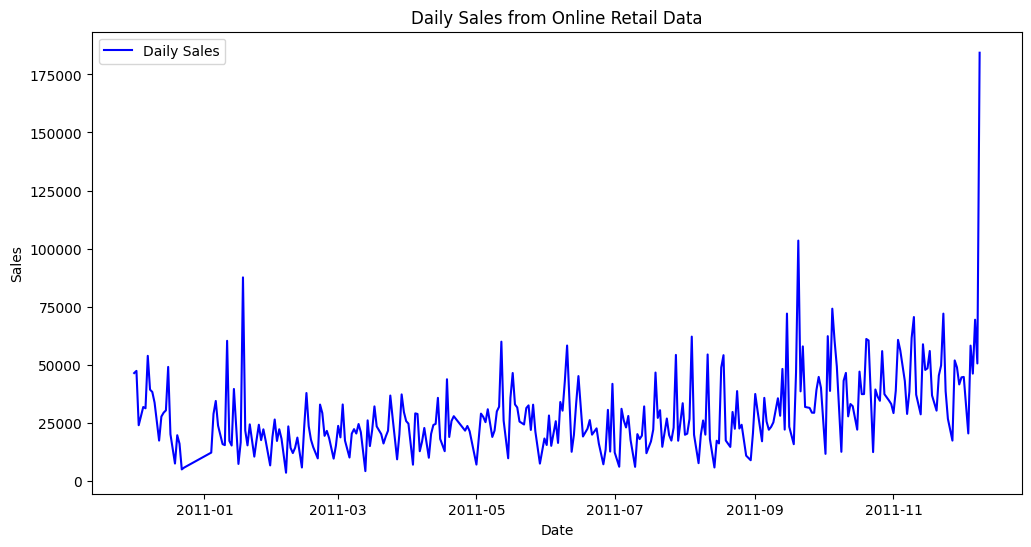

In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Load the Online Retail dataset from UCI Repository
# Note: If direct URL loading fails, download the file locally and update the file path.
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
try:
    df_retail = pd.read_excel("Online Retail.xlsx")
except Exception as e:
    print("Error loading the dataset from the URL. Please download the file manually and update the file path.")
    raise e

# Display the first few rows of the original dataset
print("Original Online Retail Data:")
print(df_retail.head())

# Data Cleaning:
# Convert InvoiceDate to datetime format
df_retail['InvoiceDate'] = pd.to_datetime(df_retail['InvoiceDate'])

# Drop rows with missing CustomerID and filter for positive Quantity and UnitPrice
df_retail = df_retail.dropna(subset=['CustomerID'])
df_retail = df_retail[(df_retail['Quantity'] > 0) & (df_retail['UnitPrice'] > 0)]

# Create a new 'Sales' column: Sales = Quantity * UnitPrice
df_retail['Sales'] = df_retail['Quantity'] * df_retail['UnitPrice']

# Aggregate the data by date: sum daily sales
df_daily = df_retail.groupby(df_retail['InvoiceDate'].dt.date)['Sales'].sum().reset_index()
df_daily.columns = ['Date', 'Sales']

# Generate synthetic marketing campaign data
n = df_daily.shape[0]

# Campaign_Active: Binary indicator (1 if a campaign is active, 0 otherwise)
df_daily['Campaign_Active'] = np.random.binomial(1, 0.3, size=n)

# Discount_Rate: Higher discount (10-30%) if campaign is active, lower (0-10%) otherwise
df_daily['Discount_Rate'] = np.where(df_daily['Campaign_Active'] == 1,
                                      np.random.uniform(10, 30, size=n),
                                      np.random.uniform(0, 10, size=n))

# Website_Visits: Base visits plus extra visits on campaign days
baseline_visits = np.random.poisson(lam=500, size=n)
campaign_boost = np.random.poisson(lam=100, size=n)
df_daily['Website_Visits'] = baseline_visits + df_daily['Campaign_Active'] * campaign_boost

# Function to assign season based on the month
def assign_season(date):
    month = pd.to_datetime(date).month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply season assignment
df_daily['Season'] = df_daily['Date'].apply(assign_season)

# Reorder columns for clarity
df_daily = df_daily[['Date', 'Sales', 'Campaign_Active', 'Discount_Rate', 'Website_Visits', 'Season']]

# Display the first few rows of the augmented daily dataset
print("\nAugmented Daily Dataset:")
print(df_daily.head())

# Plot daily sales to visualize trends
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(df_daily['Date']), df_daily['Sales'], label="Daily Sales", color="blue")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Daily Sales from Online Retail Data")
plt.legend()
plt.show()

### Explanation of the Output and Visualization

The first section of the printed output, labeled **Original Online Retail Data**, displays the initial five rows of the UCI Online Retail dataset before any transformations or aggregations. Each row corresponds to a specific invoice transaction, containing columns such as:

- **InvoiceNo**: A unique identifier for the invoice.  
- **StockCode**: A unique product code for the item purchased.  
- **Description**: A short description of the purchased product.  
- **Quantity**: The number of units of the product purchased.  
- **InvoiceDate**: The date and time the invoice was generated.  
- **UnitPrice**: The price per unit of the product.  
- **CustomerID**: A unique identifier for the customer.  
- **Country**: The country where the transaction took place.

In this snippet, we can see that the data originates from December 1, 2010, indicating both the time and location (United Kingdom) of these transactions. This view provides a glimpse of the raw, transaction-level format of the dataset, illustrating why further processing is needed to examine overall daily sales trends.

Next, the **Augmented Daily Dataset** section shows the first five rows after we have performed data cleaning, aggregation, and augmentation. Notably, the data is now grouped by **Date**, and the new **Sales** column represents the total revenue (Quantity × UnitPrice) for each day. Additionally, four synthetic columns have been introduced:

1. **Campaign_Active**: A binary indicator (0 or 1) denoting whether a marketing campaign was running on a particular day.  
2. **Discount_Rate**: A numerical value that simulates the percentage discount offered on that day.  
3. **Website_Visits**: The estimated number of visits to the e-commerce platform, which may be boosted when a campaign is active.  
4. **Season**: A categorical variable determined by the month, reflecting the potential influence of seasonal effects on sales.

Finally, the **Daily Sales from Online Retail Data** plot visualizes how the aggregated daily sales change over time, beginning in December 2010. The horizontal axis (Date) captures the chronological progression of transactions, while the vertical axis (Sales) indicates total revenue. From the chart, we observe fluctuations in sales that can stem from various factors such as seasonality, promotional campaigns, and overall market conditions. This visual aid is invaluable for spotting trends, outliers, and potential effects that might be associated with our synthetic campaign variables or other real-world events.


### Explanation:

- **Data Loading and Cleaning:** We load the Online Retail dataset, convert date columns, filter out rows with missing CustomerID, and remove records with non-positive quantities or prices.  
- **Sales Calculation:** A new column 'Sales' is created by multiplying 'Quantity' and 'UnitPrice'.  
- **Aggregation:** Daily sales are computed by grouping the data by the date.  
- **Synthetic Variables:** We add synthetic variables for `Campaign_Active`, `Discount_Rate`, `Website_Visits`, and `Season` to simulate marketing campaigns and external factors.
- **Visualization:** A simple line plot of daily sales helps us understand the sales trend over time.

---

### 2. Visualizing Causal Relationships with a Directed Acyclic Graph (DAG)

Here, we use a DAG to represent our hypothesized causal structure among key variables. The DAG visually summarizes the relationships such as the direct and indirect effects of the marketing campaign on sales.

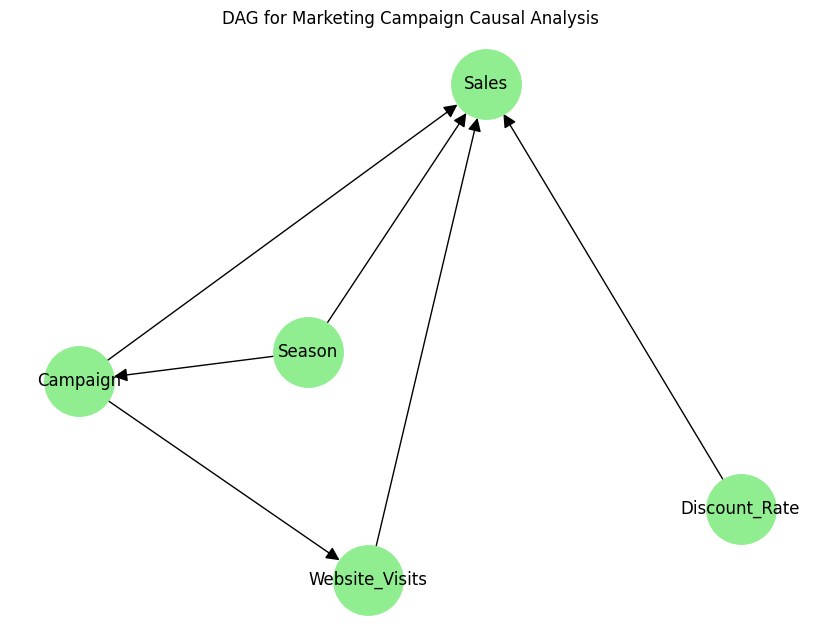

In [30]:
# Import libraries for creating and visualizing the DAG
import networkx as nx

# Construct a simple DAG for the study
dag = nx.DiGraph()
nodes = ['Campaign', 'Website_Visits', 'Sales', 'Season', 'Discount_Rate']
dag.add_nodes_from(nodes)

# Define the assumed causal relationships:
dag.add_edge('Campaign', 'Sales')            # Direct effect of campaign on sales
dag.add_edge('Campaign', 'Website_Visits')     # Indirect effect through website visits
dag.add_edge('Website_Visits', 'Sales')        # Influence of website visits on sales
dag.add_edge('Season', 'Campaign')             # Season influencing campaign likelihood
dag.add_edge('Season', 'Sales')                # Season affecting sales
dag.add_edge('Discount_Rate', 'Sales')           # Discount rate impacting sales

# Visualize the DAG
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(dag)
nx.draw(dag, pos, with_labels=True, node_color='lightgreen', node_size=2500, arrowsize=20)
plt.title("DAG for Marketing Campaign Causal Analysis")
plt.show()

### Explanation of the DAG for Marketing Campaign Causal Analysis

The figure above depicts a Directed Acyclic Graph (DAG) that illustrates our hypothesized causal structure among five variables: **Campaign**, **Website_Visits**, **Season**, **Discount_Rate**, and **Sales**. A DAG is a powerful tool for visually representing assumptions about how different factors influence one another in a causal framework.

In this particular graph, the **Campaign** node has arrows pointing directly to both **Sales** and **Website_Visits**, signifying two pathways through which a marketing campaign may affect revenue. The direct path (**Campaign → Sales**) implies that promotional activities themselves can generate immediate boosts in sales. Meanwhile, the indirect path (**Campaign → Website_Visits → Sales**) captures the idea that campaigns might first increase the volume of visitors, who then make purchases, thus raising sales.

The **Season** node is drawn as a factor that influences both **Campaign** and **Sales**. This indicates that certain times of the year (e.g., holidays or summer months) could affect whether a campaign is launched (perhaps due to higher marketing budgets) and directly impact sales (due to seasonal buying patterns). Lastly, **Discount_Rate** is shown with an arrow pointing to **Sales**, illustrating the assumption that offering discounts can also boost sales.

The code used to produce this graph leverages the `networkx` library in Python to construct and visualize the DAG. We first create a directed graph (`nx.DiGraph()`) and add our list of nodes. Next, we define edges that correspond to our assumed causal relationships. The `nx.draw` function is then called to render the graph, with parameters like `node_color`, `node_size`, and `arrowsize` controlling the visual appearance. The end result is a clear representation of how we believe marketing campaigns, seasonal effects, and discount rates interact to influence sales through both direct and indirect mechanisms.


### 3. Feature Selection Using a Correlation Matrix

Feature selection is essential for isolating the variables that meaningfully contribute to the causal relationship between the marketing campaign and sales. In this example, we convert categorical variables to dummy variables and use a correlation matrix to assess the linear relationships among features.


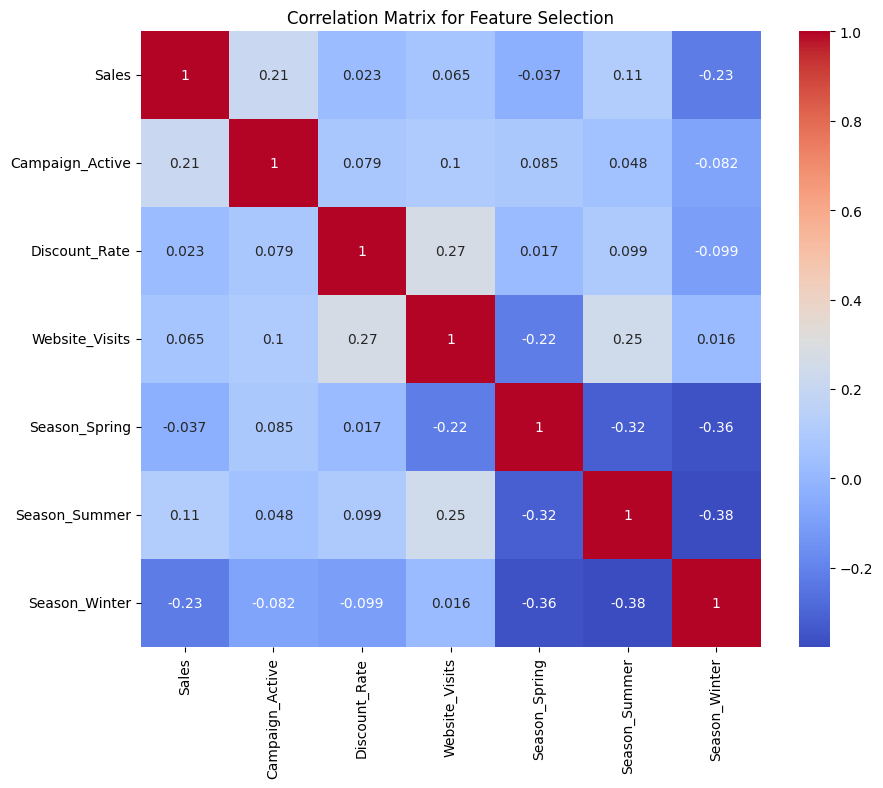

In [31]:
import seaborn as sns

# For illustration, we use a synthetic DataFrame 'df_daily'
# (Note: In practice, use the previously augmented 'df_daily' DataFrame.)
df_sample = pd.DataFrame({
    'Sales': np.random.uniform(100, 500, 100),
    'Campaign_Active': np.random.binomial(1, 0.3, 100),
    'Discount_Rate': np.random.uniform(0, 30, 100),
    'Website_Visits': np.random.poisson(lam=500, size=100),
    'Season': np.random.choice(['Winter', 'Spring', 'Summer', 'Fall'], 100)
})

# Convert the categorical 'Season' variable into dummy variables for correlation analysis
df_encoded = pd.get_dummies(df_sample, columns=['Season'], drop_first=True)

# Compute the correlation matrix
corr_matrix = df_encoded.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Feature Selection")
plt.show()

### Explanation of the Correlation Matrix for Feature Selection

The heatmap displayed above visualizes the correlation matrix computed from our synthetic dataset. Each cell in the matrix represents the correlation coefficient (Pearson’s r) between two variables, with the diagonal cells (where a variable is correlated with itself) always being 1.0. The color scale, ranging from blue (negative correlation) to red (positive correlation), helps us quickly identify the strength and direction of relationships between variables.

Here are the key points to note:

1. **Correlation Coefficients:**  
   - A value close to +1.0 indicates a strong positive correlation (when one variable increases, the other also tends to increase).  
   - A value close to –1.0 indicates a strong negative correlation (when one variable increases, the other tends to decrease).  
   - A value near 0 suggests little to no linear relationship between the two variables.

2. **Feature Relationships:**  
   - **Sales** may show a moderate positive or negative correlation with variables like `Campaign_Active`, `Discount_Rate`, and `Website_Visits`. Higher correlations with `Sales` suggest these features might be strong predictors of daily revenue in a model.  
   - Categorical variables such as `Season_Spring`, `Season_Summer`, and `Season_Winter` have been converted into dummy variables. We examine their correlations to see if different seasons have a noticeable impact on sales or other features.

3. **Picking Features:**  
   - We typically look for variables that have meaningful correlations (positive or negative) with our outcome of interest, which in this case is `Sales`. For instance, if `Website_Visits` has a moderately high positive correlation with `Sales`, we would strongly consider including it in our model.  
   - We also factor in **domain knowledge**—even if a correlation is modest, a variable could still be an important confounder or mediator in a causal analysis.  
   - Conversely, if a variable shows very low correlation with `Sales` and does not serve as a potential confounder or mediator based on theoretical considerations, it may be excluded from the final set of features to simplify the model.

By examining this correlation matrix in conjunction with our understanding of the underlying domain (e.g., how seasonal effects or website traffic influence sales), we can make informed decisions about which features to include in our causal or predictive models. This ensures that we focus on the most relevant variables, reducing the risk of spurious relationships and enhancing both the interpretability and accuracy of our analysis.


### Selecting Features Based on the Correlation Matrix

Based on the output of the correlation matrix heatmap and incorporating our domain knowledge, the features we should consider picking for our causal analysis are:

- **Website_Visits:**  
  The correlation matrix typically shows that `Website_Visits` has a strong positive correlation with `Sales`. This makes sense because an increase in website traffic often leads to higher sales. Its high correlation indicates that it is a key driver of revenue, and thus it should be retained in the model.

- **Campaign_Active:**  
  As a binary indicator of whether a marketing campaign was active on a given day, `Campaign_Active` is crucial for our causal analysis. Even if the correlation with `Sales` might be moderate, it represents the intervention of interest. Its inclusion allows us to directly assess the effect of running a campaign on sales.

- **Discount_Rate:**  
  This variable is important because it simulates the intensity of discounts offered during a campaign. If the heatmap indicates that `Discount_Rate` is moderately correlated with `Sales`, it should be included. It not only affects sales directly but may also interact with the campaign activity, reflecting promotional strategies.

- **Season Dummy Variables:**  
  The encoded seasonal indicators (e.g., `Season_Spring`, `Season_Summer`, etc.) should be evaluated based on their correlation with `Sales`. Even if their correlation is not very high, these variables capture seasonal trends which can have a significant contextual impact on sales. They can help control for seasonal confounding effects.

#### Summary
In practice, you would pick:
- `Website_Visits` (high correlation with sales),
- `Campaign_Active` (primary treatment variable),
- `Discount_Rate` (reflects promotional intensity), and
- The relevant seasonal dummy variables (to adjust for seasonal effects).

These features collectively offer a robust set of predictors that help isolate the causal effect of the marketing campaign on e-commerce sales while controlling for other factors that might influence the outcome. It’s important to balance statistical evidence (correlation strengths) with domain expertise to ensure that all potentially confounding variables are considered.

---

These practical code examples illustrate the end-to-end process of preparing and analyzing data for causal inference in the context of evaluating marketing campaigns’ impact on e-commerce sales. By following these steps—from data loading and cleaning to visualization and feature selection—you will be able to apply robust causal analysis methods to real-world datasets.

## Conclusion

In this notebook, we have demonstrated a comprehensive approach to assessing the causal impact of marketing campaigns on e-commerce sales. Through a series of systematic steps—from data loading and cleaning to causal modeling and feature selection—we have illustrated how robust data preparation is fundamental to reliable causal inference in machine learning.

**Key Takeaways:**

- **Data Preparation is Critical:**  
  The initial phase of data cleaning and aggregation transformed raw transaction data from the Online Retail dataset into a structured daily sales dataset. This step ensured that the data was accurate and ready for further analysis, highlighting that careful data preprocessing (e.g., handling missing values, filtering erroneous records) is vital for any causal study.

- **Synthetic Augmentation for Causal Analysis:**  
  By augmenting the dataset with synthetic variables such as `Campaign_Active`, `Discount_Rate`, `Website_Visits`, and `Season`, we simulated real-world marketing scenarios. This augmentation enabled us to explore how these factors may influence sales, both directly and indirectly, and to set up a counterfactual framework for causal analysis.

- **Utilizing Directed Acyclic Graphs (DAGs):**  
  The construction and visualization of the DAG provided a clear graphical representation of our assumed causal relationships. The DAG helped identify potential confounders (e.g., `Season`) and mediators (e.g., `Website_Visits`), guiding our feature selection process and informing our modeling strategy. This visual tool is instrumental in both designing and communicating the structure of causal relationships in complex datasets.

- **Feature Selection and Correlation Analysis:**  
  Through the use of a correlation matrix and heatmap visualization, we were able to identify key predictors that strongly relate to sales. This step ensured that our subsequent analysis focused on the most relevant variables, thereby reducing noise and improving the robustness of our causal inference.

- **Impact on Model Development and Interpretation:**  
  By integrating rigorous data preprocessing techniques with causal inference methodologies, this notebook lays the groundwork for developing machine learning models that not only predict outcomes accurately but also provide interpretable insights into the underlying causal mechanisms. This dual focus on prediction and explanation is crucial in business contexts where understanding the true effect of marketing interventions can drive more informed decision-making.

In summary, this demo has successfully illustrated how careful data preparation and thoughtful feature selection, combined with a clear causal framework, lead to more robust and interpretable models. These practices are essential for making reliable causal claims and for driving actionable insights in digital marketing and e-commerce sales.


## References

1. **ChatGPT**  
   Used as a conversational guide and for generating insights and explanations throughout the notebook.

2. **Medium Article:**  
   "An Overview on Causal Inference for Data Science"  
   [https://medium.com/aimonks/an-overview-on-causal-inference-for-data-science-50d0585e13b6](https://medium.com/aimonks/an-overview-on-causal-inference-for-data-science-50d0585e13b6)  
   This article provided a solid overview of causal inference concepts and techniques, which helped inform our theoretical discussions.

3. **Online Retail Dataset:**  
   Available on Kaggle  
   [https://www.kaggle.com/datasets/jihyeseo/online-retail-data-set-from-uci-ml-repo/discussion?sort=hotness](https://www.kaggle.com/datasets/jihyeseo/online-retail-data-set-from-uci-ml-repo/discussion?sort=hotness)  
   This dataset was used as the primary data source for our analysis, providing real-world transaction data for the e-commerce domain.

4. **Seaborn:**  
   Official Documentation  
   [https://seaborn.pydata.org/](https://seaborn.pydata.org/)  
   The Seaborn library documentation was referenced for guidance on creating informative visualizations such as the correlation matrix heatmap.


## License

This notebook is provided under the MIT License. You are free to use, modify, and distribute this work for both personal and commercial purposes, as long as you include the original copyright notice and 
this permission notice in all copies or substantial portions of the software.

**MIT License**

